In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shareddrives/Project2- Fraudulent Jobs/Data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv(drive_dir + 'fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
for col in df.columns:
    print(f'{col}: {df[col].isna().sum()}')

job_id: 0
title: 0
location: 346
department: 11547
salary_range: 15012
company_profile: 3308
description: 1
requirements: 2695
benefits: 7210
telecommuting: 0
has_company_logo: 0
has_questions: 0
employment_type: 3471
required_experience: 7050
required_education: 8105
industry: 4903
function: 6455
fraudulent: 0


In [5]:
for col in df.columns:
  num_missing = df[col].isna().sum()
  pct_missing = num_missing / df.shape[0]
  print(f'{col}: {num_missing} ({100 * pct_missing}%)')

job_id: 0 (0.0%)
title: 0 (0.0%)
location: 346 (1.9351230425055927%)
department: 11547 (64.58053691275167%)
salary_range: 15012 (83.95973154362416%)
company_profile: 3308 (18.501118568232663%)
description: 1 (0.005592841163310962%)
requirements: 2695 (15.072706935123042%)
benefits: 7210 (40.324384787472034%)
telecommuting: 0 (0.0%)
has_company_logo: 0 (0.0%)
has_questions: 0 (0.0%)
employment_type: 3471 (19.41275167785235%)
required_experience: 7050 (39.42953020134228%)
required_education: 8105 (45.32997762863535%)
industry: 4903 (27.421700223713646%)
function: 6455 (36.10178970917226%)
fraudulent: 0 (0.0%)


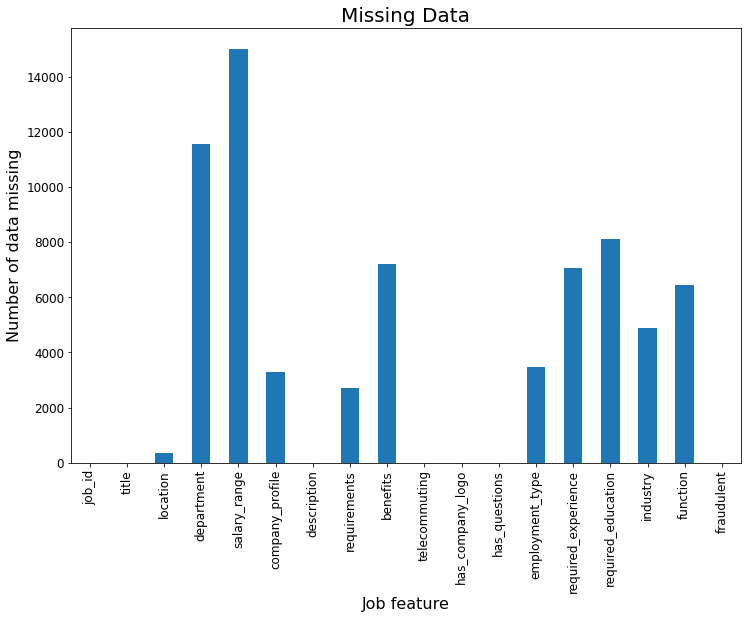

In [6]:
df.isnull().sum().plot.bar(figsize=(12,8))
plt.xlabel('Job feature', fontsize = 16)
plt.ylabel('Number of data missing', fontsize = 16)
plt.title('Missing Data', fontsize = 20)
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)

In [7]:
df['fraudulent'].sum()

866

In [8]:
df['isnona'] = df.replace('nan',np.nan).notna().all(1).astype(int)

In [9]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,isnona
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0


In [10]:
df['isnona'].sum()

774

Text(0.5, 1.0, 'na values and fraudulent')

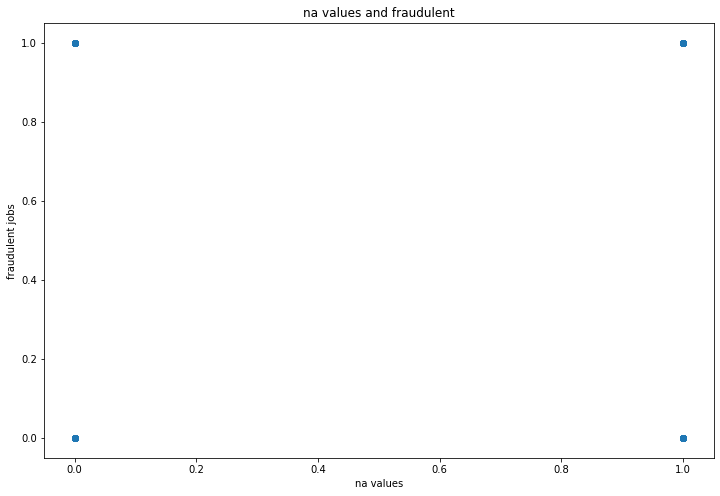

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(x=df['isnona'], y=df['fraudulent'])
plt.xlabel('na values')
plt.ylabel('fraudulent jobs')
plt.title('na values and fraudulent')

In [12]:
np.corrcoef(df['isnona'], df['fraudulent'])[0, 1]**2

0.0019519269596520118

In [13]:
def f(row):
    if 'nan' in row.values:
        return 1
    else:
        return 0

df['isna'] = df.apply(f, axis=1)

In [14]:
df['isna'].sum()

0

In [15]:
def f(row):
  for col in df.columns:
    num_missing = df[col].isna().sum()
    pct_missing = num_missing / df.shape[0]
    return num_missing
df['numberofmissingdata'] = df.apply(f, axis=1)

In [16]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,isnona,isna,numberofmissingdata
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,0,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0


In [17]:
df['department_na'] = df['department'].isna()

In [18]:
df['salary_range_na'] = df['salary_range'].isna()

In [19]:
df['location_na'] = df['location'].isna()
df['company_profile_na'] = df['company_profile'].isna()
df['requirements_na'] = df['requirements'].isna()
df['benefits_na'] = df['benefits'].isna()
df['employment_type_na'] = df['employment_type'].isna()
df['required_experience_na'] = df['required_experience'].isna()
df['required_education_na'] = df['required_education'].isna()
df['industry_na'] = df['industry'].isna()
df['function_na'] = df['function'].isna()

In [20]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,salary_range_na,location_na,company_profile_na,requirements_na,benefits_na,employment_type_na,required_experience_na,required_education_na,industry_na,function_na
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,True,False,False,False,True,False,False,True,True,False
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,True,False,False,False,False,False,False,True,False,False
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,True,False,False,False,True,True,True,True,True,True
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,True,False,False,False,False,False,False,False,False,False
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,True,False,False,False,False,False,False,False,False,False


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
y=df['fraudulent']

In [24]:
lr.fit(X=df[['department_na','salary_range_na']],
       y=df['fraudulent'])

LinearRegression()

In [25]:
preds = lr.predict(X=df[['department_na','salary_range_na']])

In [26]:
df['Predicted fraudulence'] = preds

In [27]:
lr.coef_

array([-0.00464739, -0.03440263])

In [28]:
lr.intercept_

0.08031967269847963

Text(0.5, 1.0, 'Actual fraud vs Predicted fraud')

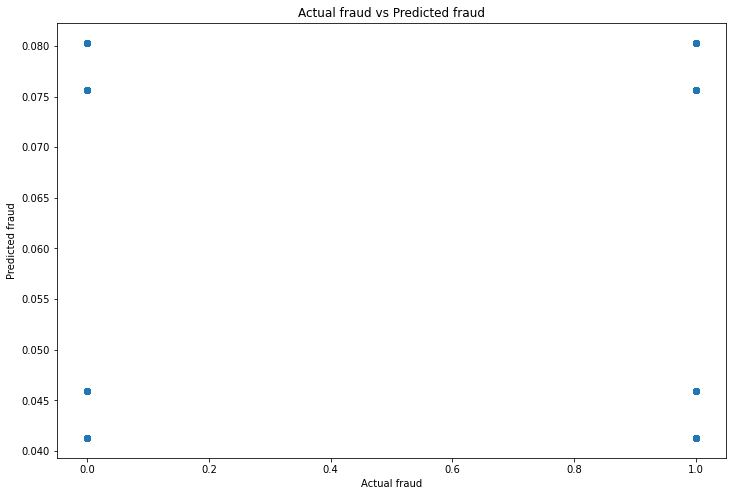

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(x=df['fraudulent'], y=df['Predicted fraudulence'])
plt.xlabel('Actual fraud')
plt.ylabel('Predicted fraud')
plt.title('Actual fraud vs Predicted fraud')

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y, preds))

ValueError: ignored

In [ ]:
for col in df.columns:
    print(f'{col}: {df[col].isna().sum()}')

In [ ]:
df['proportion of na']= df.apply(X = is.na(df), MARGIN = 1, FUN = sum)

In [ ]:
df['na_count'] = df.apply(is.na(df), 1, sum)

In [ ]:
df['na_count']= df.loc[[]].isna().sum().sum()

In [ ]:
def f(row):
    count = 0
    if 'NaN' in row.values:
      count = count + 1
    return count
df['na_count'] = df.apply(f, axis=1)

In [ ]:
df.head()

In [ ]:
#df[df.iloc[:, insert column number here]=='NaN']